# Common Libraries

In [ ]:
import warnings
warnings.filterwarnings(action='once')

In [ ]:
!pip install feature-engine

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import seaborn as sns

# Data


In [ ]:
cancer= load_breast_cancer()

In [ ]:
data = pd.DataFrame(data= np.c_[cancer['data'], cancer['target']],
                     columns= list(cancer['feature_names']) + ['target'])

In [ ]:
data['target'].value_counts()


1.0    357
0.0    212
Name: target, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
data.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [ ]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 2, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

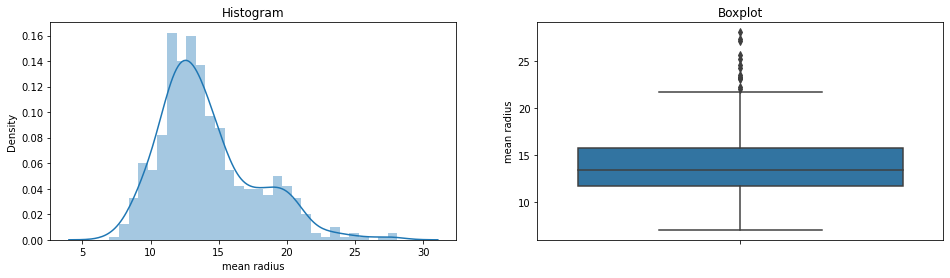

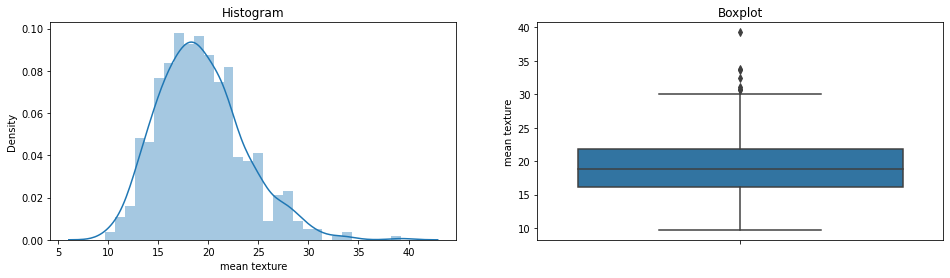

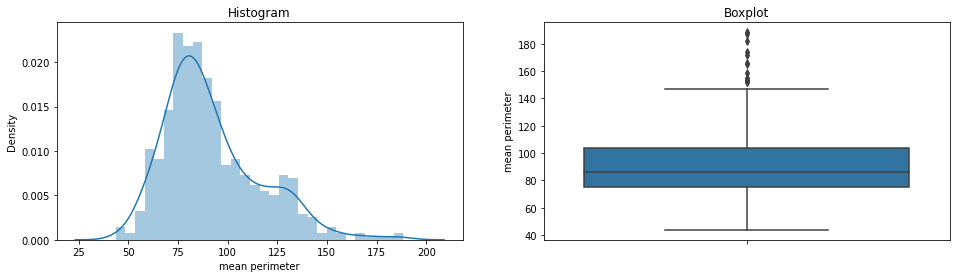

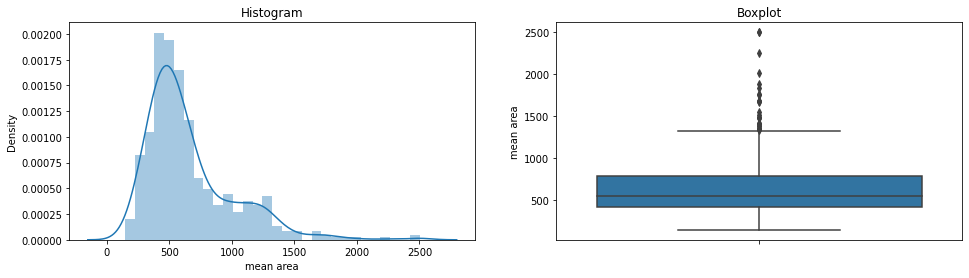

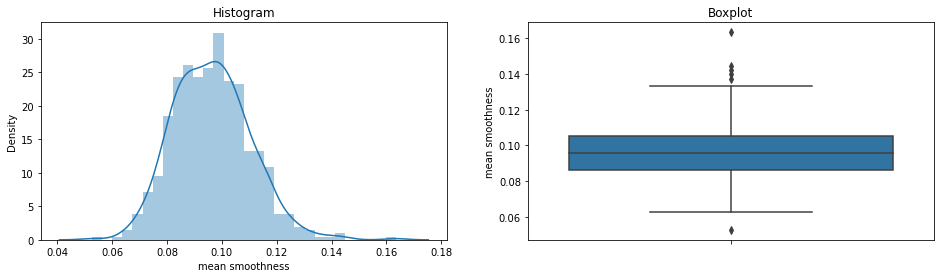

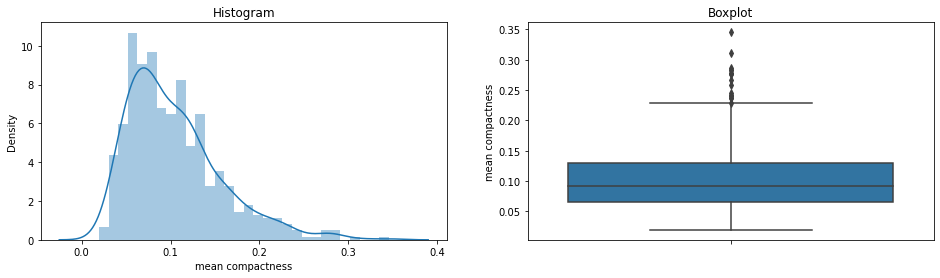

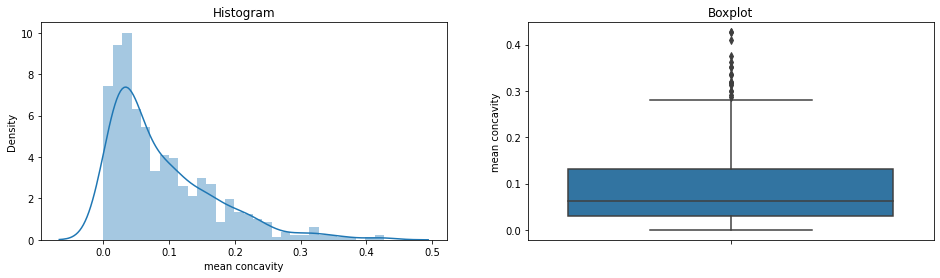

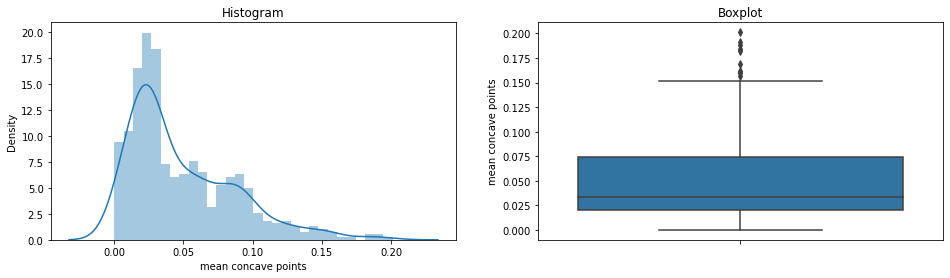

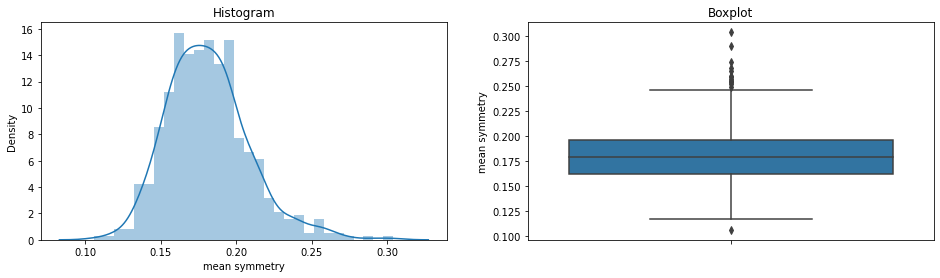

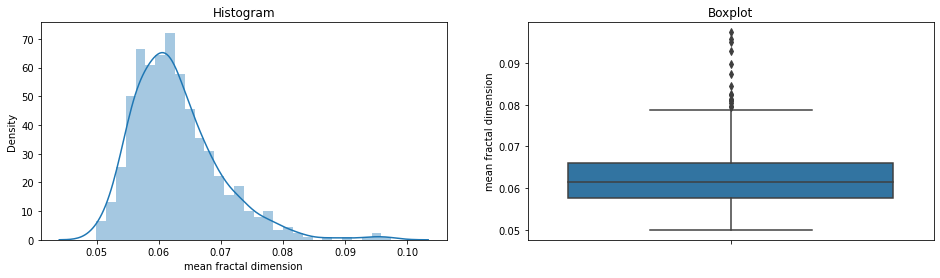

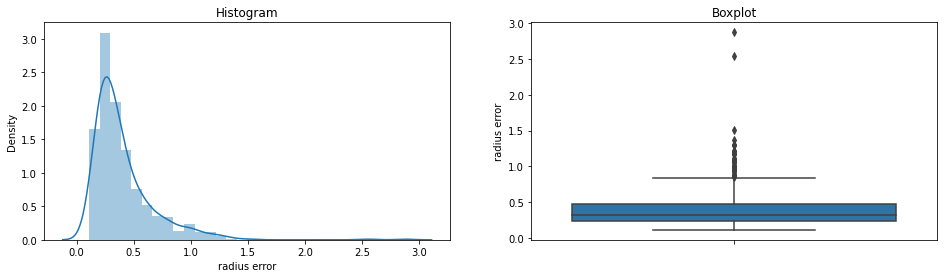

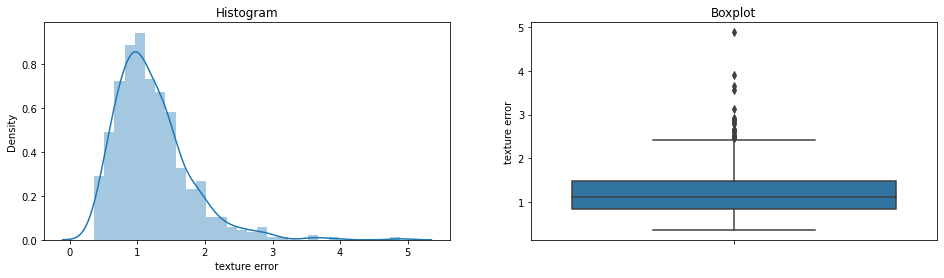

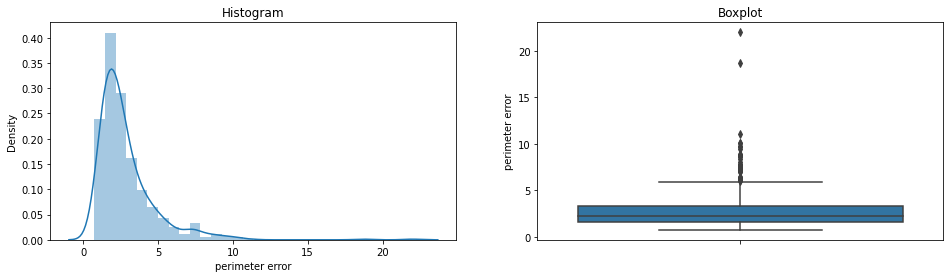

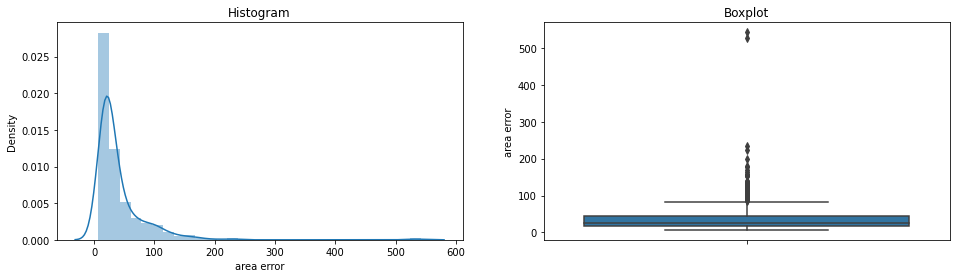

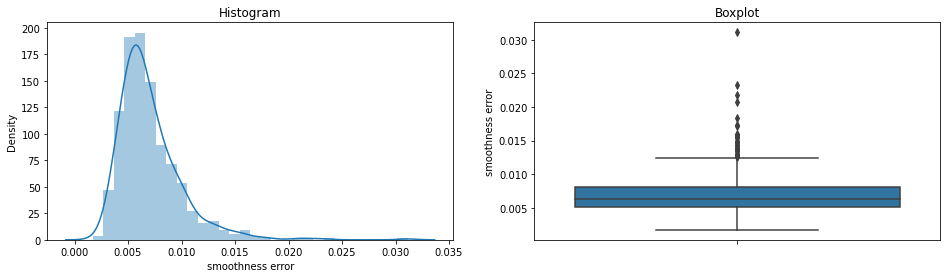

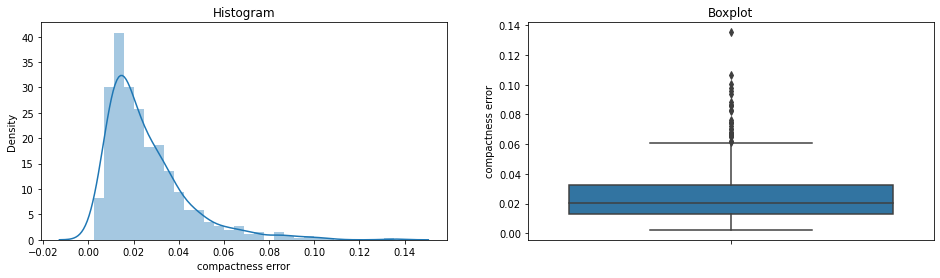

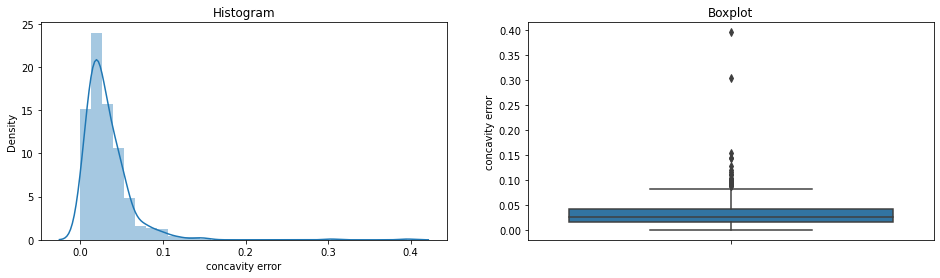

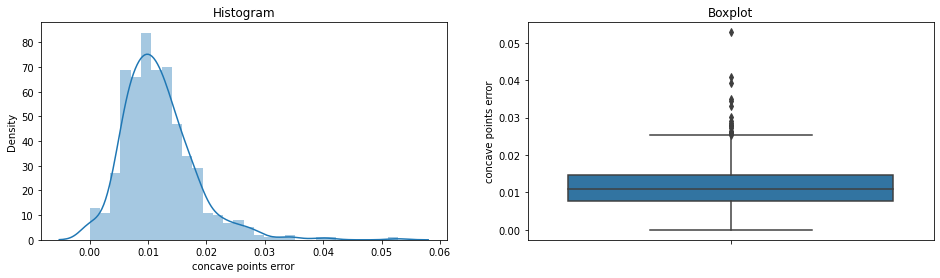

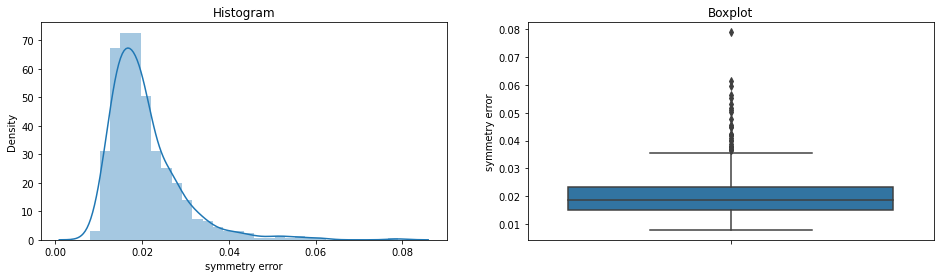

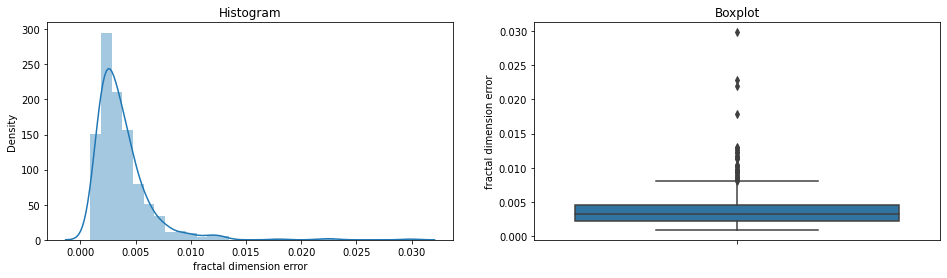

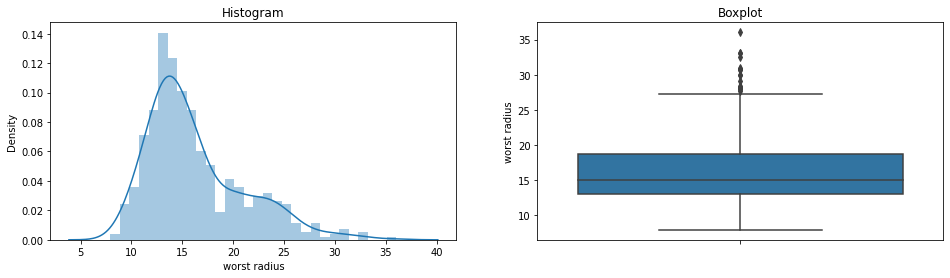

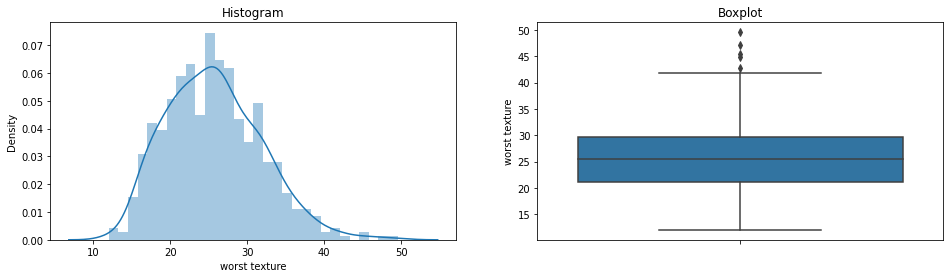

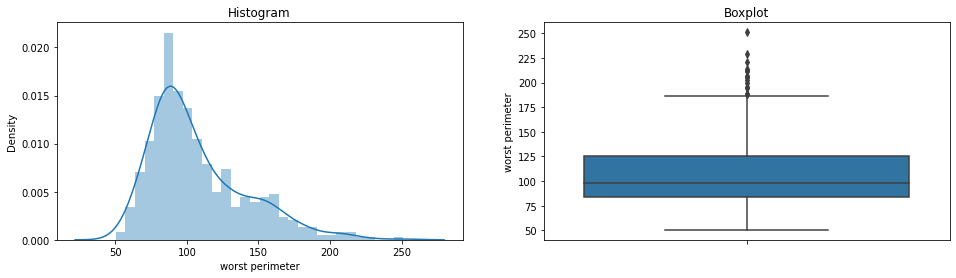

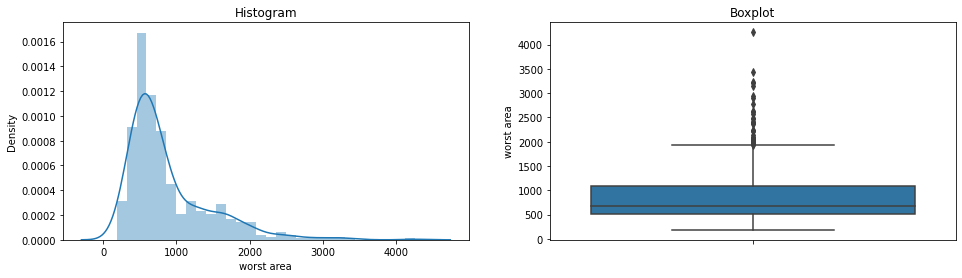

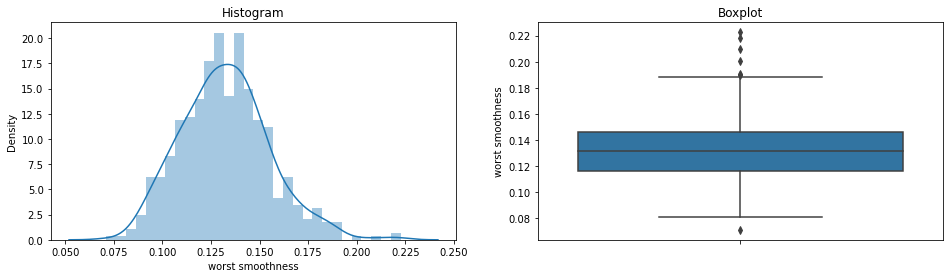

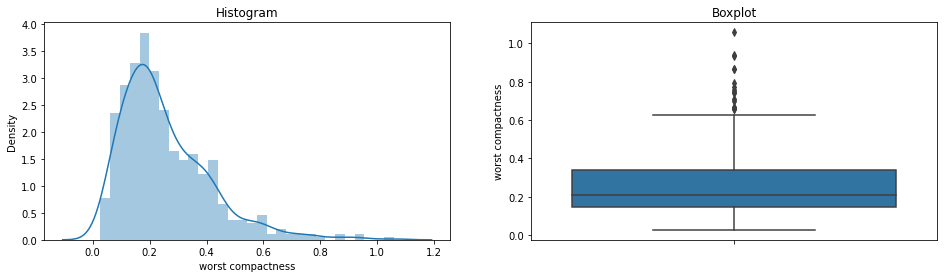

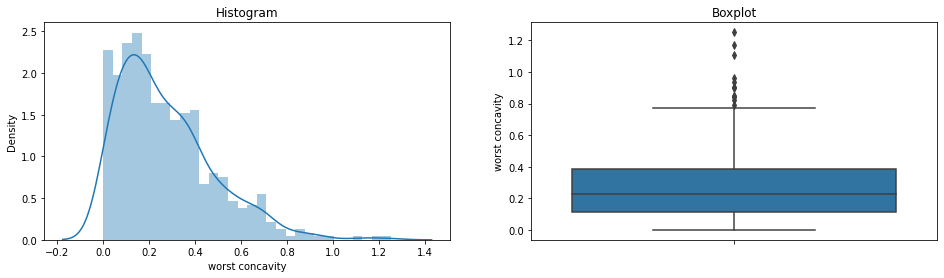

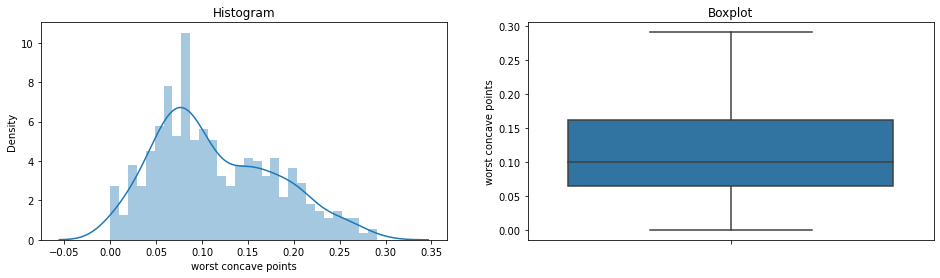

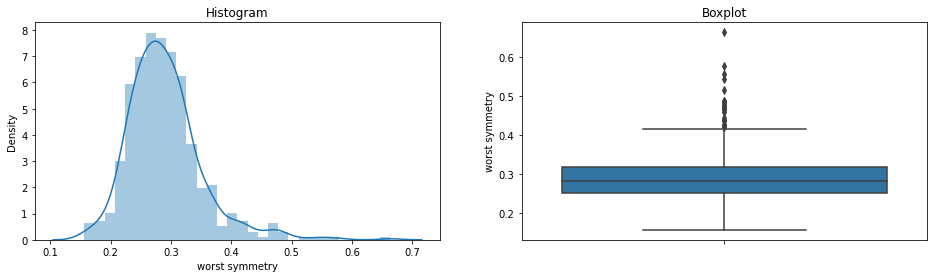

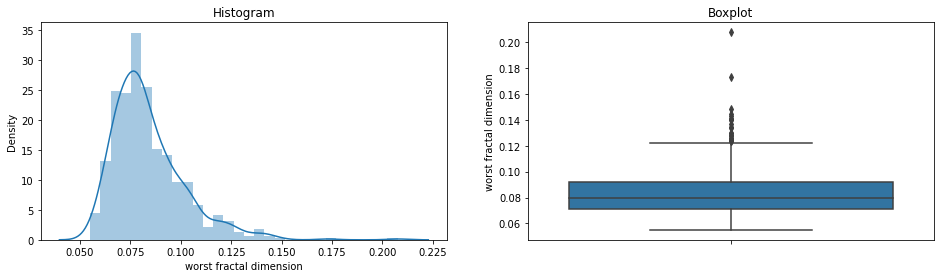

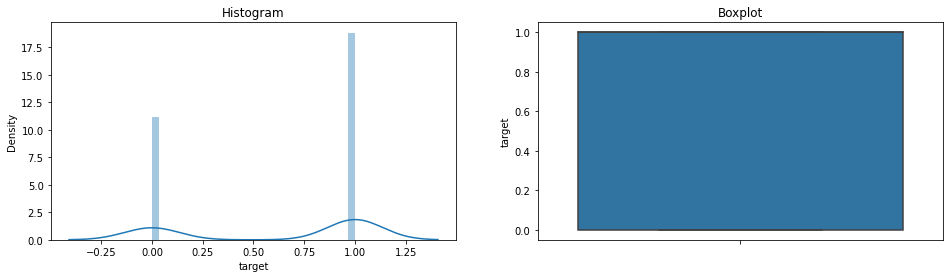

In [ ]:
for var in data:
    diagnostic_plots(data, var)

# PreProcessing

In [ ]:
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(data.drop('target',axis=1), data.target, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.25, random_state=0)

In [ ]:
print(f'Train size is {X_train.shape}' )
print(f'Test size is {X_test.shape}' )
print(f'Val size is {X_val.shape}' )

Train size is (341, 30)
Test size is (114, 30)
Val size is (114, 30)


In [ ]:
from feature_engine.transformation import YeoJohnsonTransformer as YJT
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline

In [ ]:
cancer_pipeline=Pipeline([
    ('power_transform',YJT()),
    ('scale',RobustScaler())

])

In [ ]:
cancer_pipeline.fit(X_train)

Pipeline(memory=None,
         steps=[('power_transform', YeoJohnsonTransformer(variables=None)),
                ('scale',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True))],
         verbose=False)

In [ ]:
X_train=pd.DataFrame(cancer_pipeline.transform(X_train),columns=X_train.columns)
X_test=pd.DataFrame(cancer_pipeline.transform(X_test),columns=X_test.columns)
X_val=pd.DataFrame(cancer_pipeline.transform(X_val),columns=X_val.columns)

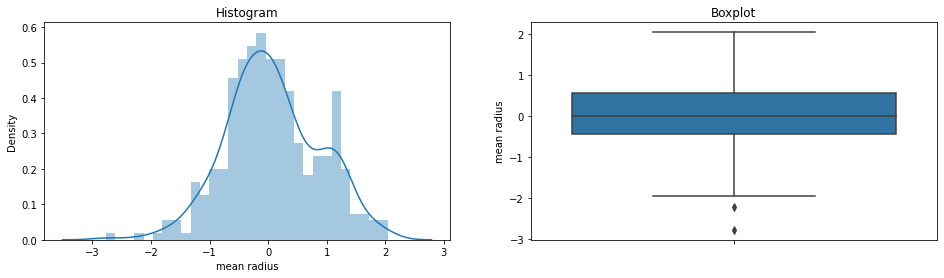

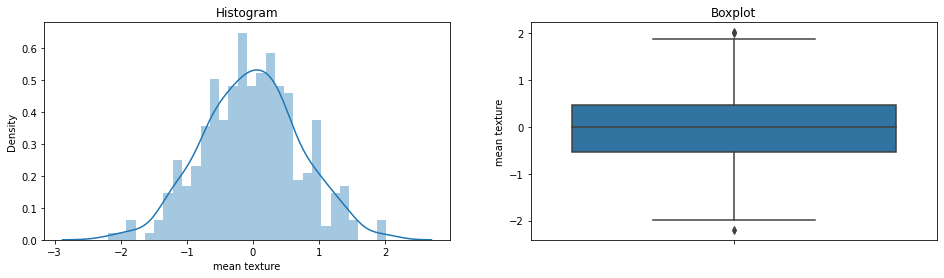

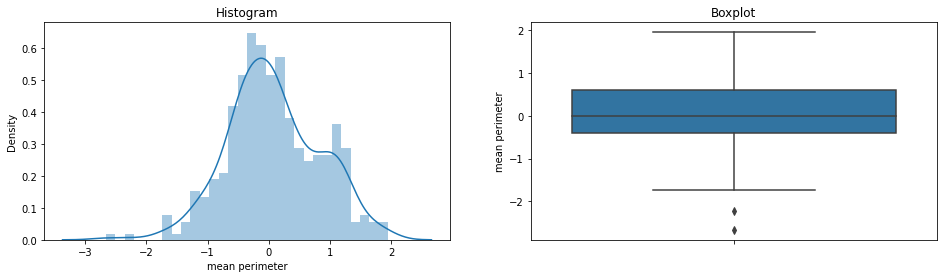

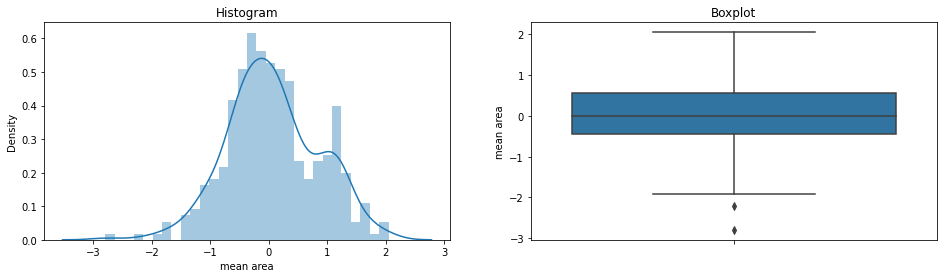

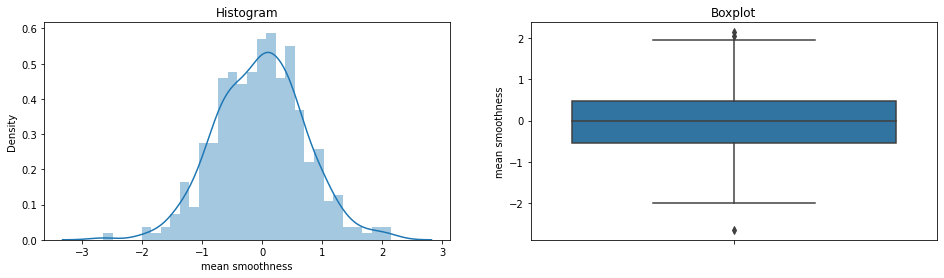

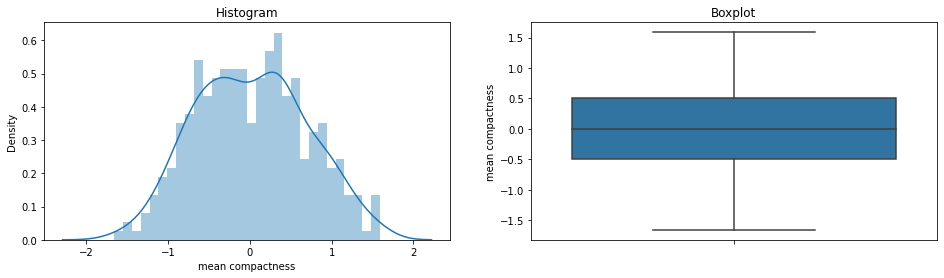

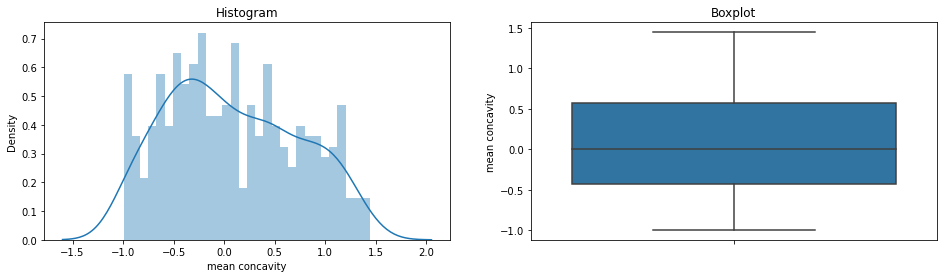

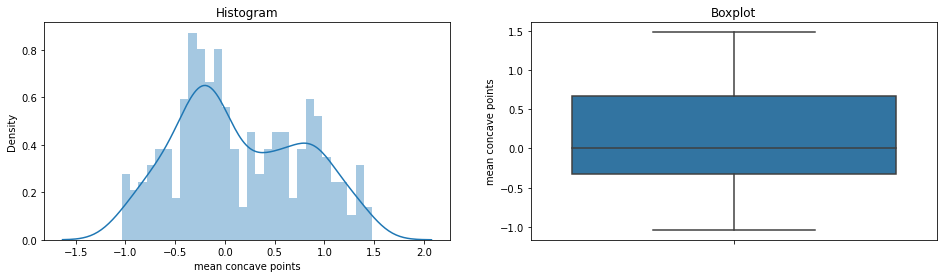

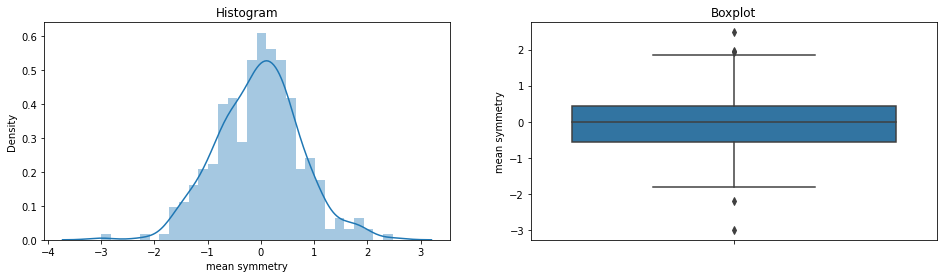

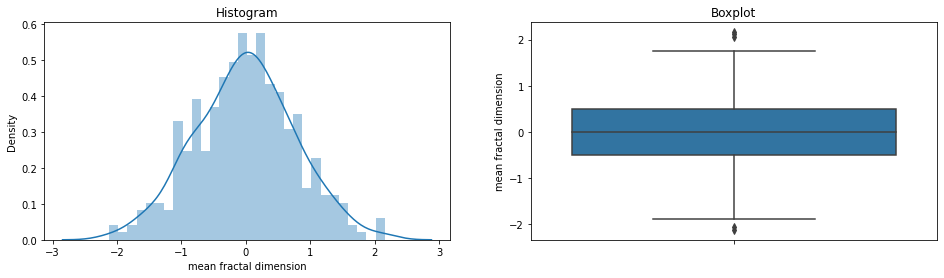

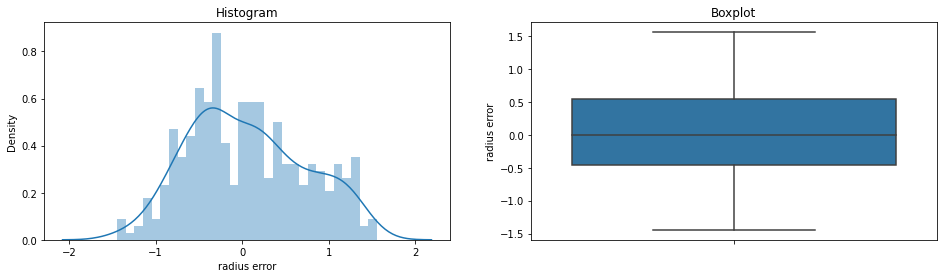

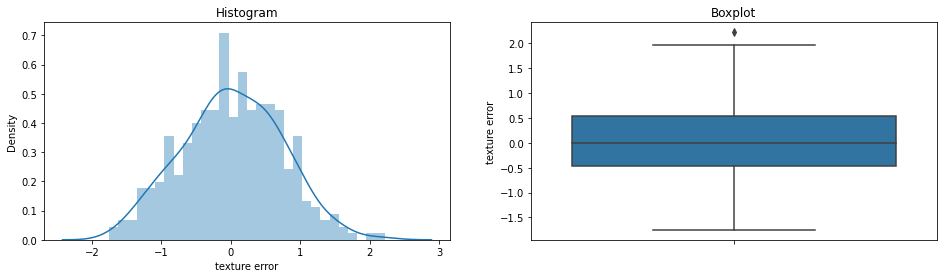

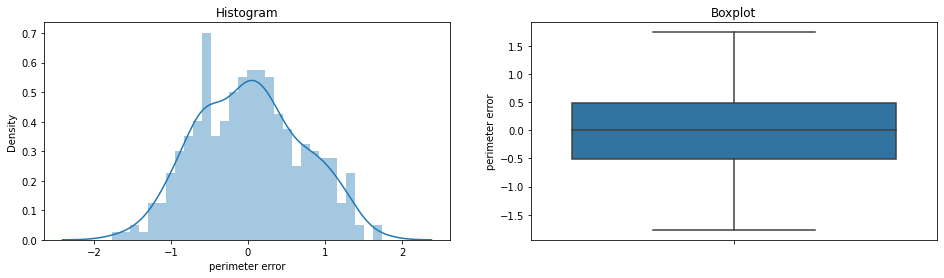

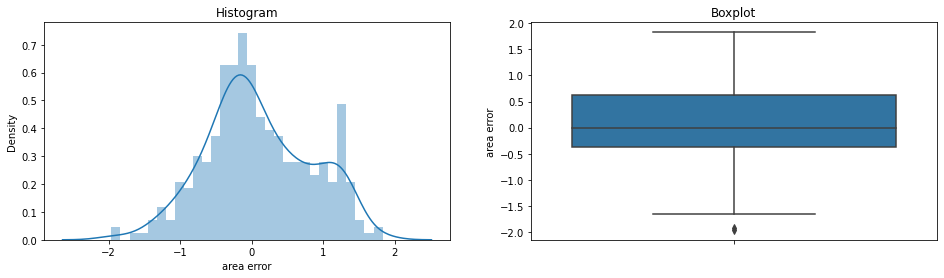

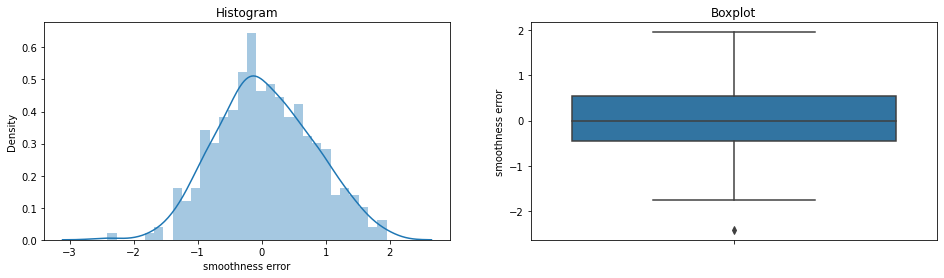

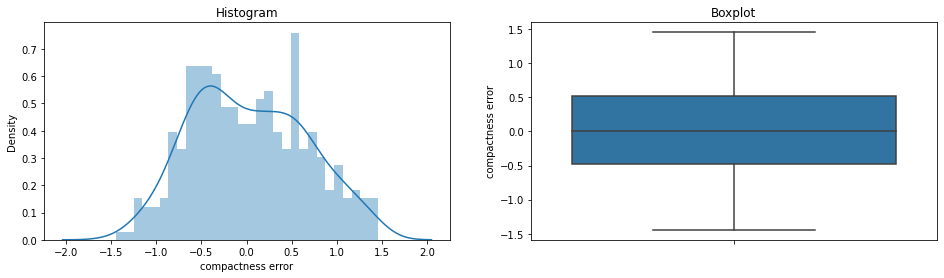

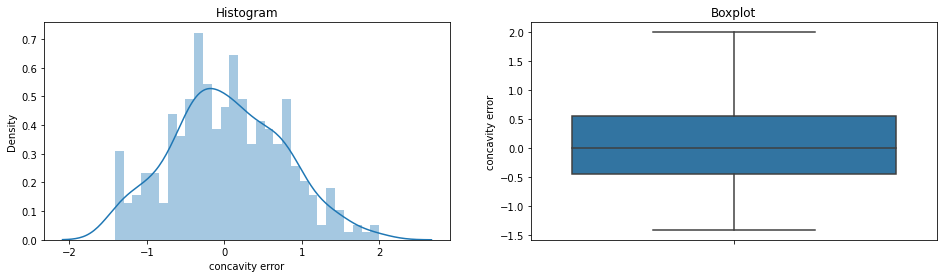

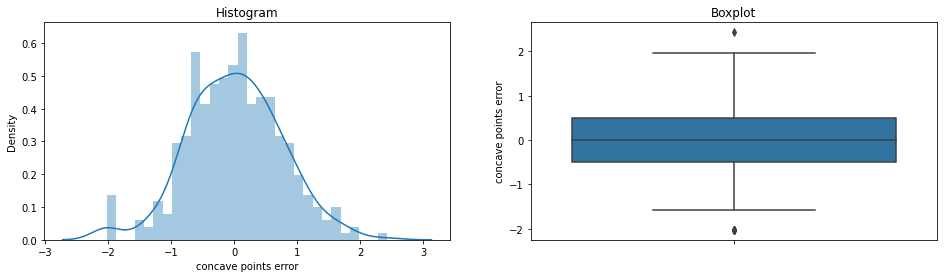

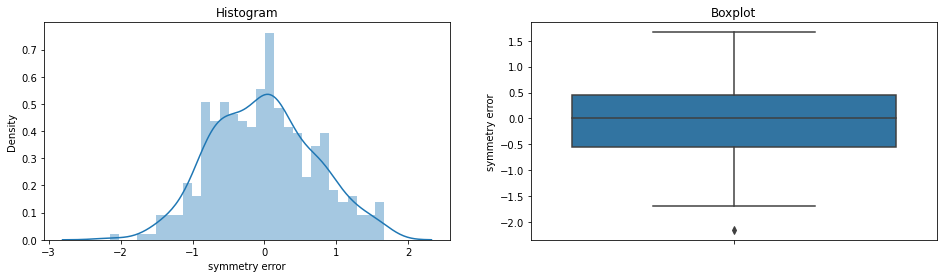

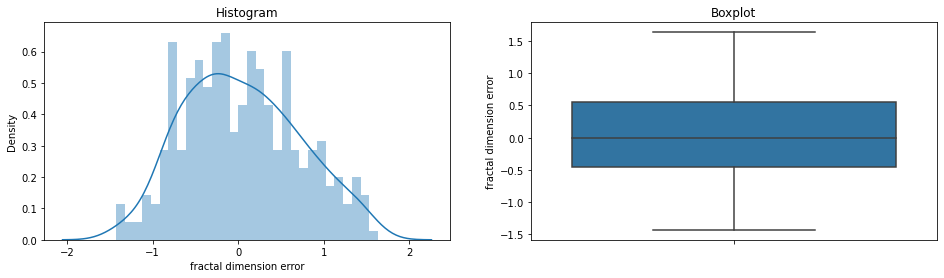

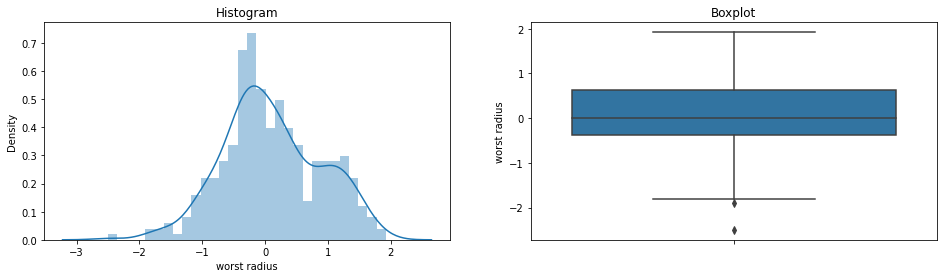

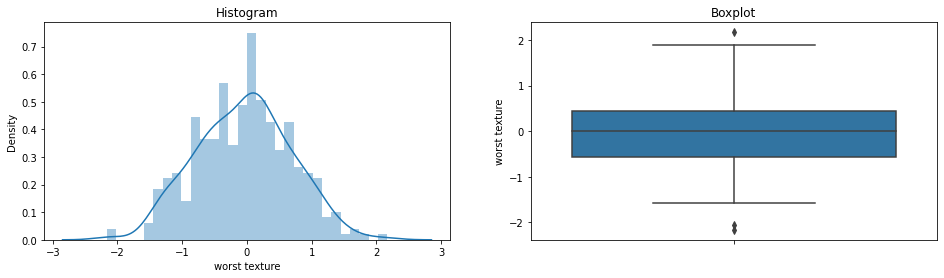

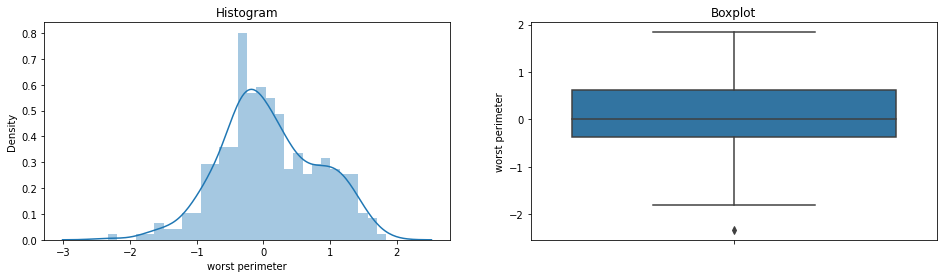

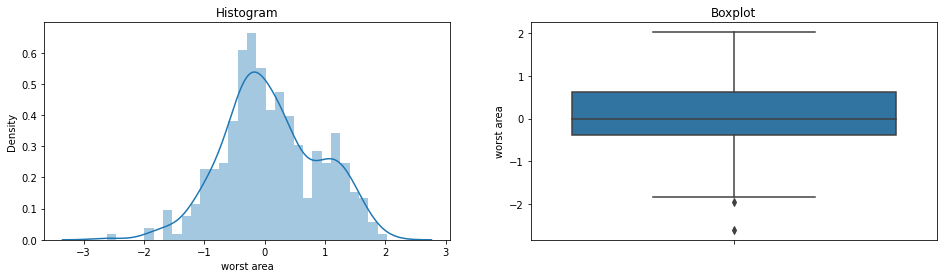

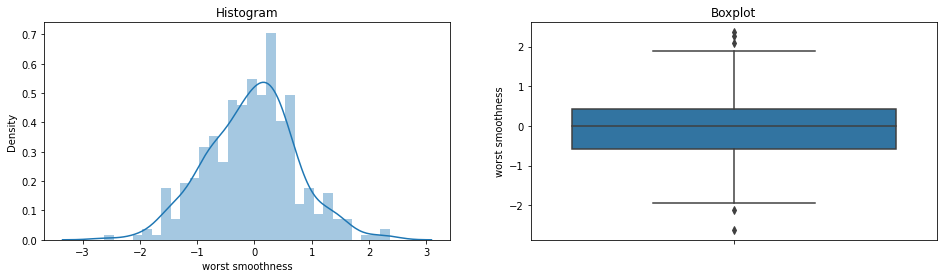

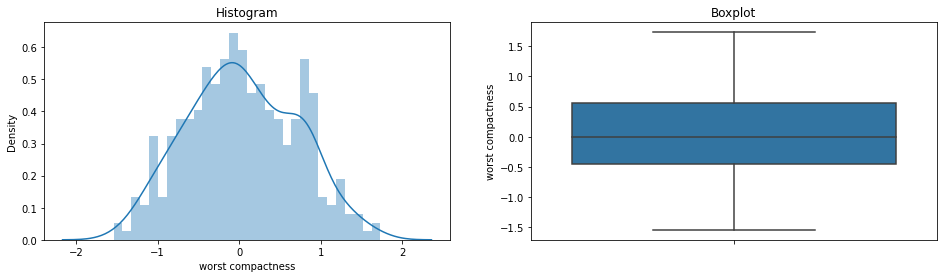

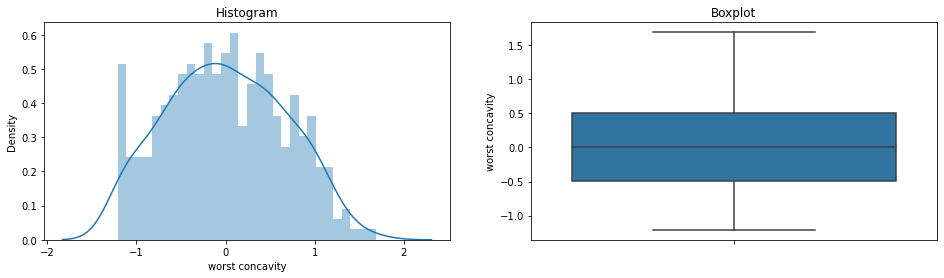

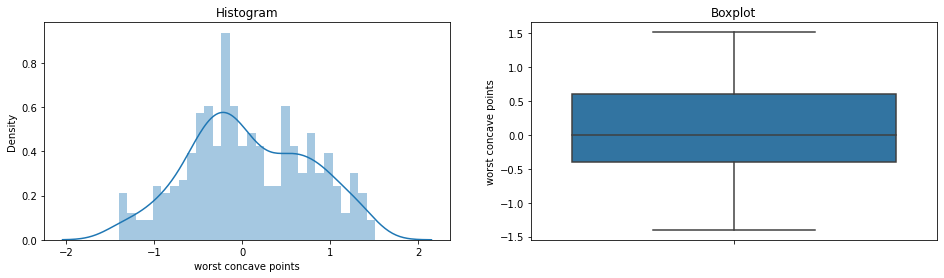

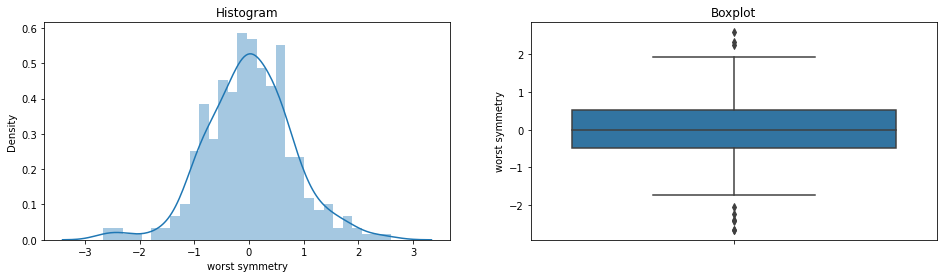

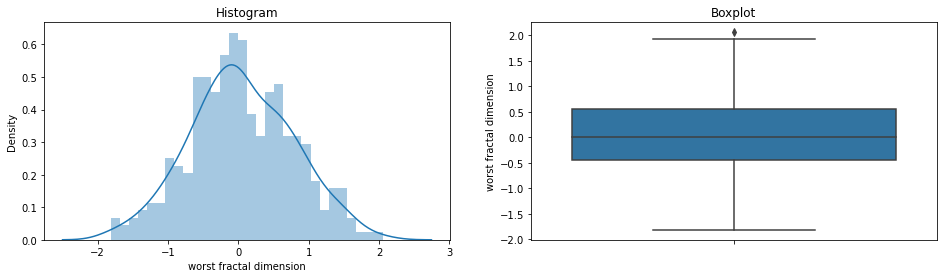

In [ ]:
for var in X_train:
    diagnostic_plots(X_train, var)

# Simple Models

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
knn= KNeighborsClassifier()

knn_param= {'p': [1,2], 'n_neighbors' : range(1,20), 'weights': ['uniform','distance']}
knn_grid = GridSearchCV(knn, knn_param,cv=5, return_train_score=True, )


In [ ]:
knn_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': range(1, 20), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print(f'Best Mean Cross Validation Score is {knn_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {knn_grid.best_params_}')
print(f'Train score is {knn_grid.score(X_train,y_train)}')
print(f'Test score is {knn_grid.score(X_test,y_test)}')
print(f'Validation score is {knn_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9647485080988918
Best Mean Cross Validation Score is {'n_neighbors': 9, 'p': 2, 'weights': 'uniform'}
Train score is 0.967741935483871
Test score is 0.9473684210526315
Validation score is 0.9736842105263158


## Logistic Regresion

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logreg=LogisticRegression(max_iter=1000)

logreg_param= {'C': [0.001,0.01,0.1,1,10,100], 'penalty': ['l1','l2']}
logreg_grid = GridSearchCV(logreg, logreg_param,cv=5, return_train_score=True, )
logreg_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=1000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print(f'Best Mean Cross Validation Score is {logreg_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {logreg_grid.best_params_}')
print(f'Train score is {logreg_grid.score(X_train,y_train)}')
print(f'Test score is {logreg_grid.score(X_test,y_test)}')
print(f'Val score is {logreg_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.979539641943734
Best Mean Cross Validation Score is {'C': 1, 'penalty': 'l2'}
Train score is 0.9853372434017595
Test score is 0.9649122807017544
Val score is 0.9649122807017544


## Linear SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
lsvc=SVC(kernel='linear',probability=True)
lsvc_param= {'C': [0.001,0.01,0.1,1,10,100],}
lsvc_grid = GridSearchCV(lsvc, lsvc_param,cv=5, return_train_score=True, )
lsvc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [ ]:
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {lsvc_grid.best_params_}')
print(f'Train score is {lsvc_grid.score(X_train,y_train)}')
print(f'Test score is {lsvc_grid.score(X_test,y_test)}')
print(f'Val score is {lsvc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9794543904518329
Best Mean Cross Validation Score is {'C': 100}
Train score is 1.0
Test score is 0.956140350877193
Val score is 0.9385964912280702


## Kernel SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
ksvc=SVC(probability=True)
ksvc_param = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},

              {'kernel': ['poly'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
              'degree' : range(1,5)},

             {'kernel': ['sigmoid'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}]

ksvc_grid = GridSearchCV(ksvc, ksvc_param,cv=5, return_train_score=True, )
ksvc_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['rbf']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'degree': range(1, 5),
                          'gamma': [0.001, 0.01, 0.1, 1, 10, 100],
                          'kernel': ['poly']},
                         {'C': [0.001, 0.01, 0.1, 1, 10, 100],
                          'gamma': [0.001, 0.01, 0.1, 1, 10

In [ ]:
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {ksvc_grid.best_params_}')
print(f'Train score is {ksvc_grid.score(X_train,y_train)}')
print(f'Test score is {ksvc_grid.score(X_test,y_test)}')
print(f'Val score is {ksvc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9794970161977835
Best Mean Cross Validation Score is {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Train score is 0.9882697947214076
Test score is 0.9824561403508771
Val score is 0.9649122807017544


## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtree = DecisionTreeClassifier()
dtree_param = {"max_depth": range(1,10),
           "min_samples_split": range(2,10,1),
           "max_leaf_nodes": range(2,6),
              "splitter": ["best", "random"]}
dtree_grid = GridSearchCV(dtree, dtree_param,cv=5, return_train_score=True, )
dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(1, 10),
                         '

In [ ]:
print(f'Best Mean Cross Validation Score is {dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {dtree_grid.best_params_}')
print(f'Train score is {dtree_grid.score(X_train,y_train)}')
print(f'Test score is {dtree_grid.score(X_test,y_test)}')
print(f'Val score is {dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9325660699062233
Best Mean Cross Validation Score is {'max_depth': 5, 'max_leaf_nodes': 4, 'min_samples_split': 5, 'splitter': 'random'}
Train score is 0.9149560117302052
Test score is 0.9122807017543859
Val score is 0.9210526315789473


# Ensemble Models

## Bagging

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
bag_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=True, random_state=0, oob_score=True)

bag_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree1_grid = GridSearchCV(bag_dtree1, bag_dtree1_param,cv=5, return_train_score=True, )
bag_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [ ]:
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree1_grid.best_params_}')
print(f'Train score is {bag_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree1_grid.score(X_test,y_test)}')
print(f'Val score is {bag_dtree1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9442881500426257
Best Mean Cross Validation Score is {'base_estimator__max_depth': 7, 'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9970674486803519
Test score is 0.9736842105263158
Val score is 0.956140350877193


In [ ]:
bag_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=True, random_state=0, oob_score=True)

bag_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_dtree2_grid = GridSearchCV(bag_dtree2, bag_dtree2_param,cv=5, return_train_score=True, )
bag_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=8,
                                                                               max_features=None,
                                                                               max_leaf_nodes=5,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               

In [ ]:
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_dtree2_grid.best_params_}')
print(f'Train score is {bag_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {bag_dtree2_grid.score(X_test,y_test)}')
print(f'Val score is {bag_dtree2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9442881500426257
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9560117302052786
Test score is 0.9473684210526315
Val score is 0.9473684210526315


In [ ]:
bag_logreg1 = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=True, random_state=0, oob_score=True)

bag_logreg1_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
bag_logreg1_grid = GridSearchCV(bag_logreg1, bag_logreg1_param,cv=5, return_train_score=True, )
bag_logreg1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='auto',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                                           

In [ ]:
print(f'Best Mean Cross Validation Score is {bag_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {bag_logreg1_grid.best_params_}')
print(f'Train score is {bag_logreg1_grid.score(X_train,y_train)}')
print(f'Test score is {bag_logreg1_grid.score(X_test,y_test)}')
print(f'Val score is {bag_logreg1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9736999147485081
Best Mean Cross Validation Score is {'base_estimator__C': 1, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 0.9882697947214076
Test score is 0.9649122807017544
Val score is 0.9736842105263158


## Pasting

In [ ]:
paste_dtree1 = BaggingClassifier(base_estimator=DecisionTreeClassifier(), bootstrap=False, random_state=0, oob_score=False)

paste_dtree1_param = {
                 'base_estimator__max_depth': range(1,10),
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree1_grid = GridSearchCV(paste_dtree1, paste_dtree1_param,cv=5, return_train_score=True, )
paste_dtree1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=None,
                                                                               max_features=None,
                                                                               max_leaf_nodes=None,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                         

In [ ]:
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree1_grid.best_params_}')
print(f'Train score is {paste_dtree1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree1_grid.score(X_test,y_test)}')
print(f'Val score is {paste_dtree1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9356777493606139
Best Mean Cross Validation Score is {'base_estimator__max_depth': 6, 'max_samples': 0.8, 'n_estimators': 100}
Train score is 1.0
Test score is 0.9736842105263158
Val score is 0.9385964912280702


In [ ]:
paste_dtree2 = BaggingClassifier(DecisionTreeClassifier(max_depth= 8, max_leaf_nodes=5, min_samples_split= 3, splitter= 'random'), bootstrap=False, random_state=0, oob_score=False)

paste_dtree2_param = {
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_dtree2_grid = GridSearchCV(paste_dtree2, paste_dtree2_param,cv=5, return_train_score=True, )
paste_dtree2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                               class_weight=None,
                                                                               criterion='gini',
                                                                               max_depth=8,
                                                                               max_features=None,
                                                                               max_leaf_nodes=5,
                                                                               min_impurity_decrease=0.0,
                                                                               min_impurity_split=None,
                                                                               min_samples_leaf=1,
                                                                               

In [ ]:
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_dtree2_grid.best_params_}')
print(f'Train score is {paste_dtree2_grid.score(X_train,y_train)}')
print(f'Test score is {paste_dtree2_grid.score(X_test,y_test)}')
print(f'Val score is {paste_dtree2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9471867007672634
Best Mean Cross Validation Score is {'max_samples': 0.8, 'n_estimators': 25}
Train score is 0.9648093841642229
Test score is 0.956140350877193
Val score is 0.956140350877193


In [ ]:
paste_logreg1 = BaggingClassifier(base_estimator=LogisticRegression(), bootstrap=False, random_state=0, oob_score=False)

paste_logreg1_param = {
                 'base_estimator__C': [0.001,0.01,0.1,1,10,100],
                 'max_samples':  [0.8,1],
                 'n_estimators': [10,25,100]}
paste_logreg1_grid = GridSearchCV(paste_logreg1, paste_logreg1_param,cv=5, return_train_score=True, )
paste_logreg1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=BaggingClassifier(base_estimator=LogisticRegression(C=1.0,
                                                                           class_weight=None,
                                                                           dual=False,
                                                                           fit_intercept=True,
                                                                           intercept_scaling=1,
                                                                           l1_ratio=None,
                                                                           max_iter=100,
                                                                           multi_class='auto',
                                                                           n_jobs=None,
                                                                           penalty='l2',
                                                           

In [ ]:
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {paste_logreg1_grid.best_params_}')
print(f'Train score is {paste_logreg1_grid.score(X_train,y_train)}')
print(f'Test score is {paste_logreg1_grid.score(X_test,y_test)}')
print(f'Val score is {paste_logreg1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9765984654731458
Best Mean Cross Validation Score is {'base_estimator__C': 1, 'max_samples': 0.8, 'n_estimators': 10}
Train score is 0.9853372434017595
Test score is 0.9649122807017544
Val score is 0.9649122807017544


## Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc =RandomForestClassifier(random_state=42)
rfc_param = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rfc_grid = GridSearchCV(rfc, rfc_param,cv=5, return_train_score=True, )
rfc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [ ]:
print(f'Best Mean Cross Validation Score is {rfc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {rfc_grid.best_params_}')
print(f'Train score is {rfc_grid.score(X_train,y_train)}')
print(f'Test score is {rfc_grid.score(X_test,y_test)}')
print(f'Val score is {rfc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9559676044330775
Best Mean Cross Validation Score is {'criterion': 'entropy', 'max_depth': 6, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9970674486803519
Test score is 0.9736842105263158
Val score is 0.956140350877193


## Extra-Trees

In [ ]:
from  sklearn.ensemble import ExtraTreesClassifier

In [ ]:
etc= ExtraTreesClassifier(random_state=42)
etc_param = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
etc_grid = GridSearchCV(etc, etc_param,cv=5, return_train_score=True, )
etc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                                            class_weight=None, criterion='gini',
                                            max_depth=None, max_features='auto',
                                            max_leaf_nodes=None,
                                            max_samples=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                                            min_weight_fraction_leaf=0.0,
                                            n_estimators=100, n_jobs=None,
                                            oob_score=False, random_state=42,
                                            verbose=0, warm_start=False),
             iid='deprecated'

In [ ]:
print(f'Best Mean Cross Validation Score is {etc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {etc_grid.best_params_}')
print(f'Train score is {etc_grid.score(X_train,y_train)}')
print(f'Test score is {etc_grid.score(X_test,y_test)}')
print(f'Val score is {etc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9559676044330775
Best Mean Cross Validation Score is {'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 500}
Train score is 0.9970674486803519
Test score is 0.9473684210526315
Val score is 0.9736842105263158


## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adc_dtree =AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),random_state=42)
adc_dtree_param = {
              'base_estimator__criterion' : ["gini", "entropy"],
              'base_estimator__splitter' :   ["best", "random"],
              'base_estimator__max_depth' : [2,4,6],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
adc_dtree_grid = GridSearchCV(adc_dtree, adc_dtree_param,cv=5, return_train_score=True, )
adc_dtree_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [ ]:
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_dtree_grid.best_params_}')
print(f'Train score is {adc_dtree_grid.score(X_train,y_train)}')
print(f'Test score is {adc_dtree_grid.score(X_test,y_test)}')
print(f'Val score is {adc_dtree_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9677749360613811
Best Mean Cross Validation Score is {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 4, 'base_estimator__splitter': 'random', 'learning_rate': 1.0, 'n_estimators': 100}
Train score is 1.0
Test score is 0.9912280701754386
Val score is 0.9824561403508771


In [ ]:
adc_svc =AdaBoostClassifier(base_estimator=SVC(kernel='rbf',probability=True),random_state=42)
adc_svc_param = {
              'base_estimator__C' : [ 0.01, 0.1, 1, 10],
              'base_estimator__gamma' :   [0.01, 0.1, 1, 10],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],

             }
adc_svc_grid = GridSearchCV(adc_svc, adc_svc_param,cv=5, return_train_score=True, )
adc_svc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=SVC(C=1.0,
                                                             break_ties=False,
                                                             cache_size=200,
                                                             class_weight=None,
                                                             coef0=0.0,
                                                             decision_function_shape='ovr',
                                                             degree=3,
                                                             gamma='scale',
                                                             kernel='rbf',
                                                             max_iter=-1,
                                                             probability=True,
                                                          

In [ ]:
print(f'Best Mean Cross Validation Score is {adc_svc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {adc_svc_grid.best_params_}')
print(f'Train score is {adc_svc_grid.score(X_train,y_train)}')
print(f'Test score is {adc_svc_grid.score(X_test,y_test)}')
print(f'Val score is {adc_svc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9736572890025575
Best Mean Cross Validation Score is {'base_estimator__C': 10, 'base_estimator__gamma': 0.01, 'learning_rate': 0.5, 'n_estimators': 100}
Train score is 0.9912023460410557
Test score is 0.9736842105263158
Val score is 0.9473684210526315


## Gradient Boost

In [ ]:
from  sklearn.ensemble import GradientBoostingClassifier
gbc= GradientBoostingClassifier(random_state=42)
gbc_param = {
              'max_depth' : [2,3,4],
              'n_estimators' : [100,150],
              'learning_rate' : [0.5,1.0,2],
             }
gbc_grid = GridSearchCV(gbc, gbc_param,cv=5, return_train_score=True, )
gbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [ ]:
print(f'Best Mean Cross Validation Score is {gbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {gbc_grid.best_params_}')
print(f'Train score is {gbc_grid.score(X_train,y_train)}')
print(f'Test score is {gbc_grid.score(X_test,y_test)}')
print(f'Val score is {gbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9443307757885762
Best Mean Cross Validation Score is {'learning_rate': 0.5, 'max_depth': 2, 'n_estimators': 100}
Train score is 1.0
Test score is 0.9736842105263158
Val score is 0.956140350877193


## XGBoost



In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
from  xgboost import XGBClassifier
xgbc= XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic')
xgbc_param = {
              'max_depth' : [2,4,6],
              'n_estimators' : [50,100,150],
              'learning_rate' : [0.1,0.5,0.6,0.8],
               'min_child_weight' : [1,3,5,7],
                'subsample':[0.6,0.7,0.8,0.9,1]
             }
xgbc_grid = GridSearchCV(xgbc, xgbc_param,cv=5, return_train_score=True, )
xgbc_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1,
                                     early_stopping_rounds=2, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=42, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.1, 0.5, 0.6, 0.8],
                         'max_depth': [2, 4, 6],
 

In [ ]:
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {xgbc_grid.best_params_}')
print(f'Train score is {xgbc_grid.score(X_train,y_train)}')
print(f'Test score is {xgbc_grid.score(X_test,y_test)}')
print(f'Val score is {xgbc_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9619352088661552
Best Mean Cross Validation Score is {'learning_rate': 0.8, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 50, 'subsample': 0.8}
Train score is 0.9941348973607038
Test score is 0.9736842105263158
Val score is 0.9649122807017544


# Summary

In [ ]:
classifiers={'knn':knn_grid ,
             'logreg':logreg_grid,
             'lsvc':lsvc_grid,
             'ksvc':ksvc_grid,
             'dtree':dtree_grid,
             'bag_dtree1':bag_dtree1_grid,
             'bag_dtree1':bag_dtree2_grid,
             'bag_logreg1':bag_logreg1_grid,
            'paste_dtree1': paste_dtree1_grid,
             'paste_dtree1':paste_dtree2_grid,
             'paste_logreg1': paste_logreg1_grid,
             'rfc': rfc_grid,
             'etc': etc_grid,
             'adc_dtree':adc_dtree_grid,
             'gbc': gbc_grid,
             'xgbc': xgbc_grid}

In [ ]:
classifiers.keys()

dict_keys(['knn', 'logreg', 'lsvc', 'ksvc', 'dtree', 'bag_dtree1', 'bag_logreg1', 'paste_dtree1', 'paste_logreg1', 'rfc', 'etc', 'adc_dtree', 'gbc', 'xgbc'])

In [ ]:
results_mean_std = []
for  key, value in classifiers.items():
    mean = value.cv_results_['mean_test_score'][value.best_index_]
    std=value.cv_results_['std_test_score'][value.best_index_]

    results_mean_std.append({
        "model": key,
        "mean": mean,
        "std": std
    })

In [ ]:
# Create a Pandas DataFrame with the mean+std results
accuracy_df = pd.DataFrame(results_mean_std, columns=['model', 'mean', 'std'])


In [ ]:
# Show the accuracy dataframe

accuracy_df.sort_values(by=['mean'], inplace=True,ascending=False)
accuracy_df

,model,mean,std
1,logreg,0.979540,0.019798
3,ksvc,0.979497,0.014948
2,lsvc,0.979454,0.015014
8,paste_logreg1,0.976598,0.017499
6,bag_logreg1,0.973700,0.021359
11,adc_dtree,0.967775,0.017064
0,knn,0.964749,0.019992
13,xgbc,0.961935,0.011468
9,rfc,0.955968,0.038381
10,etc,0.955968,0.033572


In [ ]:
# Create a prediction of all models on the test set
predictions_all = {}
for  key, value in classifiers.items():
    # Get best estimator
    best_model = value.best_estimator_

    # Predict test labels
    predictions = best_model.predict(X_val)

    # Save predictions to a list
    predictions_all[key] = predictions

In [ ]:
# Creat a DataFrame for the predictions
pred = pd.DataFrame(predictions_all)

Text(0.5, 1.0, 'Correlation of the test set label prediction between models')

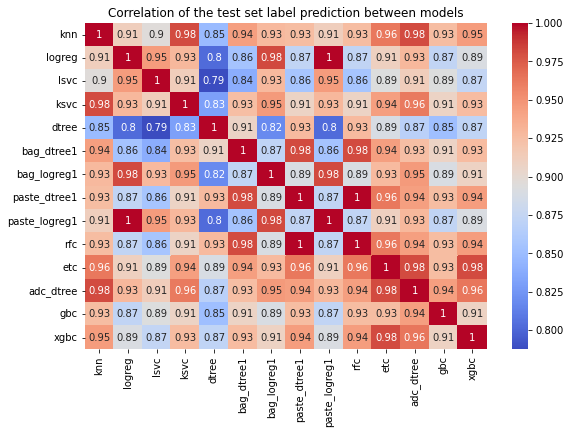

In [ ]:
# Plot a heatmap of all correlations for easier visualization
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9,6))
g = sns.heatmap(pred.corr(), annot=True, cmap='coolwarm', ax=ax)
g.set_title('Correlation of the test set label prediction between models')

In [ ]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_bottom_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=True)
    return au_corr[0:n]



In [ ]:
print("Bottom Absolute Correlations")
print(get_bottom_abs_correlations(pred, 5))

Bottom Absolute Correlations
lsvc    dtree            0.787660
dtree   paste_logreg1    0.803134
logreg  dtree            0.803134
dtree   bag_logreg1      0.818972
ksvc    dtree            0.830966
dtype: float64


# Stacking

## Voting top 5

In [ ]:
logreg_grid.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
vclf1 = VotingClassifier(estimators=
                              [('lsvc', lsvc_grid.best_estimator_),
                               ('logreg', logreg_grid.best_estimator_),
                               ('ksvc', ksvc_grid.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                               ('bag_logreg1', bag_logreg1_grid.best_estimator_)
                              ], )
vclf1_param = {
              'voting' : ['hard','soft'],
             }
vclf1_grid = GridSearchCV(vclf1, vclf1_param,cv=5, return_train_score=True, )
vclf1_grid.fit(X_train,y_train)


GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('lsvc',
                                                     SVC(C=100,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='scale',
                                                         kernel='linear',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=None,
                         

In [ ]:
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf1_grid.best_params_}')
print(f'Train score is {vclf1_grid.score(X_train,y_train)}')
print(f'Test score is {vclf1_grid.score(X_test,y_test)}')
print(f'Val score is {vclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9765984654731458
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9882697947214076
Test score is 0.9649122807017544
Val score is 0.9649122807017544


In [ ]:
vclf2 = VotingClassifier(estimators=
                              [('lsvc', lsvc_grid.best_estimator_),
                               ('logreg', logreg_grid.best_estimator_),
                               ('ksvc', ksvc_grid.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                                                            ], )
vclf2_param = {
              'voting' : ['hard','soft'],
             }
vclf2_grid = GridSearchCV(vclf2, vclf2_param,cv=5, return_train_score=True, )
vclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('lsvc',
                                                     SVC(C=100,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='scale',
                                                         kernel='linear',
                                                         max_iter=-1,
                                                         probability=True,
                                                         random_state=None,
                         

In [ ]:
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf2_grid.best_params_}')
print(f'Train score is {vclf2_grid.score(X_train,y_train)}')
print(f'Test score is {vclf2_grid.score(X_test,y_test)}')
print(f'Val score is {vclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.979539641943734
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9853372434017595
Test score is 0.9649122807017544
Val score is 0.9649122807017544


## Voting Least Correlated

In [ ]:
vclf3 = VotingClassifier(estimators=
                              [('dtree', dtree_grid.best_estimator_),
                               ('logreg', logreg_grid.best_estimator_),
                               ('gbc', gbc_grid.best_estimator_),
                              ], )
vclf3_param = {
              'voting' : ['hard','soft'],
             }
vclf3_grid = GridSearchCV(vclf3, vclf3_param,cv=5, return_train_score=True, )
vclf3_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=VotingClassifier(estimators=[('dtree',
                                                     DecisionTreeClassifier(ccp_alpha=0.0,
                                                                            class_weight=None,
                                                                            criterion='gini',
                                                                            max_depth=5,
                                                                            max_features=None,
                                                                            max_leaf_nodes=4,
                                                                            min_impurity_decrease=0.0,
                                                                            min_impurity_split=None,
                                                                            min_samples_leaf=1,
                                            

In [ ]:
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {vclf3_grid.best_params_}')
print(f'Train score is {vclf3_grid.score(X_train,y_train)}')
print(f'Test score is {vclf3_grid.score(X_test,y_test)}')
print(f'Val score is {vclf3_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9648763853367435
Best Mean Cross Validation Score is {'voting': 'hard'}
Train score is 0.9912023460410557
Test score is 0.9736842105263158
Val score is 0.9649122807017544


## Stacking Top 5



In [ ]:
from sklearn.ensemble import StackingClassifier

In [ ]:
sclf1 = StackingClassifier(estimators=
                              [('lsvc', lsvc_grid.best_estimator_),
                               ('logreg', logreg_grid.best_estimator_),
                               ('ksvc', ksvc_grid.best_estimator_),
                               ('paste_logreg1', paste_logreg1_grid.best_estimator_),
                               ('bag_logreg1', bag_logreg1_grid.best_estimator_)
                              ], final_estimator=LogisticRegression())
sclf1_param = {
              'final_estimator__C' : [0.1,0.2],
              'stack_method':['auto', 'predict_proba']
             }
sclf1_grid = GridSearchCV(sclf1, sclf1_param,cv=5, return_train_score=True, )
sclf1_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('lsvc',
                                                       SVC(C=100,
                                                           break_ties=False,
                                                           cache_size=200,
                                                           class_weight=None,
                                                           coef0=0.0,
                                                           decision_function_shape='ovr',
                                                           degree=3,
                                                           gamma='scale',
                                                           kernel='linear',
                                                           max_iter=-1,
                                                           probability=True,
                          

In [ ]:
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf1_grid.best_params_}')
print(f'Train score is {sclf1_grid.score(X_train,y_train)}')
print(f'Test score is {sclf1_grid.score(X_test,y_test)}')
print(f'Val score is {sclf1_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9765984654731458
Best Mean Cross Validation Score is {'final_estimator__C': 0.1, 'stack_method': 'auto'}
Train score is 0.9882697947214076
Test score is 0.9649122807017544
Val score is 0.9649122807017544


## Stacking Least Correlated

In [ ]:
sclf2 = StackingClassifier(estimators=
                              [('dtree', dtree_grid.best_estimator_),
                               ('logreg', logreg_grid.best_estimator_),
                                                             ],
                           final_estimator=
                           XGBClassifier(random_state=42,early_stopping_rounds=2,objective= 'binary:logistic'))
sclf2_param = {
              'final_estimator__max_depth' : [2,6],
              'final_estimator__n_estimators' : [50,150],
              'final_estimator__learning_rate' : [0.1,0.6,0.8],
              'final_estimator__min_child_weight' : [1,3,7],
              'final_estimator__subsample':[0.6,0.9,1],
              'stack_method':['auto', 'predict_proba']
             }
sclf2_grid = GridSearchCV(sclf2, sclf2_param,cv=5, return_train_score=True, )
sclf2_grid.fit(X_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=StackingClassifier(cv=None,
                                          estimators=[('dtree',
                                                       DecisionTreeClassifier(ccp_alpha=0.0,
                                                                              class_weight=None,
                                                                              criterion='gini',
                                                                              max_depth=5,
                                                                              max_features=None,
                                                                              max_leaf_nodes=4,
                                                                              min_impurity_decrease=0.0,
                                                                              min_impurity_split=None,
                                                                       

In [ ]:
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_score_}')
print(f'Best Mean Cross Validation Score is {sclf2_grid.best_params_}')
print(f'Train score is {sclf2_grid.score(X_train,y_train)}')
print(f'Test score is {sclf2_grid.score(X_test,y_test)}')
print(f'Val score is {sclf2_grid.score(X_val,y_val)}')

Best Mean Cross Validation Score is 0.9824808184143222
Best Mean Cross Validation Score is {'final_estimator__learning_rate': 0.1, 'final_estimator__max_depth': 6, 'final_estimator__min_child_weight': 3, 'final_estimator__n_estimators': 150, 'final_estimator__subsample': 1, 'stack_method': 'auto'}
Train score is 0.9824046920821115
Test score is 0.9649122807017544
Val score is 0.956140350877193
